# Hands On: Data Cleaning

Data cleaning atas data berantakan (messy data), seperti:

* missing value
* format tidak konsisten
* record tidak berbentuk baik (malformed record)
* outlier yang berlebihan

#### Lingkup hands-on:
---

* Membuang kolom-kolom tidak penting dalam suatu DataFrame
* Mengubah indeks di DataFrame
* Membersihkan kolom dengan metode .str()
* Membersihkan semua dataset dengan fungsi DataFrame.applymap()
* Merubah nama kolom sehingga kolom lebih mudah dikenali
* Melewatkan baris-baris tidak penting dalam file CSV

#### Datasets: 
---

* File CSV  tentang “Daftar Buku dari British Library”,  nama file “BL-Flickr-Images-Book.csv”,  
link: https://github.com/realpython/python-data-cleaning/blob/master/Datasets/BL-Flickr-Images-Book.csv
* File teks tentang “Kota lokasi Sekolah Tinggi di US”, nama file “university_towns.txt”, 
link: https://github.com/realpython/python-data-cleaning/blob/master/Datasets/university_towns.txt
* File CSV tentang “Partisipasi Semua Negara di Olimpiade Musim Dingin dan Musim Panas”, nama file “olympics.csv”, 
link: https://github.com/realpython/python-data-cleaning/blob/master/Datasets/olympics.csv

#### Import Modul:
---

Diasumsikan peserta sudah memahami library Pandas dan NumPy (lihat di modul sebelumnya) termasuk Pandas workshouse Series dan objek DataFrame.


1. Import Modul yang dibutuhkan:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("BL-Flickr-Images-Book.csv")

* Jangan lupa, periksa tipe datanya utk masing2 varibael/kolom/fitur dengan .dtypes

In [2]:
print(df.dtypes)

Identifier                  int64
Edition Statement          object
Place of Publication       object
Date of Publication        object
Publisher                  object
Title                      object
Author                     object
Contributors               object
Corporate Author          float64
Corporate Contributors    float64
Former owner               object
Engraver                  float64
Issuance type              object
Flickr URL                 object
Shelfmarks                 object
dtype: object


* Jika ingin melihat statistik dasar pada DataFrame di Pandas dengan fungsi .describe():

In [3]:
df.describe()

,Identifier,Corporate Author,Corporate Contributors,Engraver
count,8.287000e+03,0.0,0.0,0.0
mean,2.017344e+06,NaN,NaN,NaN
std,1.190379e+06,NaN,NaN,NaN
min,2.060000e+02,NaN,NaN,NaN
25%,9.157875e+05,NaN,NaN,NaN
50%,2.043707e+06,NaN,NaN,NaN
75%,3.047430e+06,NaN,NaN,NaN
max,4.160339e+06,NaN,NaN,NaN


#### Membuang (drop) Kolom
---

* Membuang Kolom pada DataFrame
* Sering ditemukan bbrp kategori data tidak terlalu berguna di dataset, misal untuk menganalisis IPK mahasiswa , data nama orangtua, alamat adalah data tidak penting
* Pandas menyediakan fungsi untuk membuang (drop) kolom-kolom yang tidak diinginkan dengan fungsi drop().

    1. Buat DataFrame di luar file CSV . Dalam contoh berikut kita lewatkan path relatif ke pd.read.csv, yaitu seluruh dataset berada di nama folder   Datasets  di direktori kerja

In [4]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


* Melihat pada lima entri pertama dengan perintah head(). 
* Dapat dilihat bahwa beberapa kolom memberikan informasi tambahan yang akan membantu perpustakaan tetapi tidak terlalu deskriptif tentang buku itu sendiri, diantaranya kolom: Edition Statement, Corporate Author, Corporate Contributors, Former owner, Engraver, Issuance type and Shelfmarks.
* Kita drop kolom-kolom tsb dengan perintah:

In [5]:
to_drop = ['Edition Statement', 
           'Corporate Author', 
           'Corporate Contributors', 
           'Former owner', 
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

* Kita definisikan daftar (list) nama dari semua kolom yang ingin kita drop. Kemudian jalankan perintah fungsi drop(), dengan melewatkan parameter inplace bernilai True dan parameter axis bernilai 1

In [6]:
df.drop(to_drop, inplace=True, axis=1)

* Inspeksi ulang DataFrame, kolom yang tidak diinginkan sudah dibuang:

In [7]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


* Alternatif untuk membuang kolom, dengan meneruskannya langsung ke parameter columns daripada memisahkan label-label yang mau dibuang:

In [8]:
#df.drop(colums=to_drop, inplace=True)

* Sintak di atas ini lebih intuitif dan mudah dibaca, bukan? 
* kemudian kita inspeksi/cek ulang dengan sintak yg baru ini..


In [9]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


#### Mengubah Indeks di DataFrame
---


* Index dalam Pandas memperluas fungsionalitas array NumPy untuk memungkinkan pemotongan (slicing) dan pelabelan yang lebih fleksibel. Dalam banyak kasus, akan sangat membantu jika menggunakan field pengenal data yang bernilai unik sebagai indeksnya.
* Sebagai contoh, dengan dataset di slide sebelumnya, praktiknya saat pustakawan mencari record, biasanya akan memasukan identifier unik suatu buku:

In [10]:
df['Identifier'].is_unique

True

* Gantikan indeks yang ada pada kolom ini menggunakan set_index :


In [11]:
df = df.set_index('Identifier')
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


* Kita dapat mengakses setiap records dengan cara yang mudah dengan loc[]. Cara ini digunakan untuk label-based indexing, yaitu memberi label suatu baris atau kolom tanpa memperhatikan posisi/lokasinya.

In [12]:
df.loc[206]

Place of Publication                                               London
Date of Publication                                           1879 [1878]
Publisher                                                S. Tinsley & Co.
Title                                   Walter Forbes. [A novel.] By A. A
Author                                                              A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 206, dtype: object

* Dengan kata lain, 206 adalah label pertama dari indeks. Untuk mengakses berdasarkan posisinya, gunakan df.iloc[]


* Pada slide sebelumnya, Indeks yang digunakan adalah RangeIndex: integer mulai dari 0, analog dengan range di Python. Dengan meneruskan nama kolom ke set_index, maka indeks telah diubah ke nilai dalam Identifier.

* Diperhatikan pada langkah sebelumnya bahwa telah dilakukan penetapan kembali variabel ke objek yang dikembalikan oleh metode dengan df = df.set_index(...). Ini karena, secara default, metode mengembalikan salinan objek yang dimodifikasi dan tidak membuat perubahan secara langsung ke objek. Hal ini dapat dihindari dengan mengatur parameter inplace:

In [13]:
#df.set_index('Identifier', inplace=True)

#### Merapihkan Fields dalam Data 
---

* Slide sebelumnya telah dibuang beberapa kolom tidak penting dan diubah indeks pada DataFrame hingga menjadi lebih masuk akal. 
* Selanjutnya, akan dibersihkan kolom tertentu dan mengubah menjadi bentuk/format yang seragam hingga dataset lebih mudah dipahami dan memastikan konsistensi. Dalam slide berikutnya akan dibersihkan Date of Publication dan  Place of Publication.
* Dalam inspeksi, semua tipe data saat ini adalah objek dtype yang analog dengan str di native Python
* Cara ini dilakukan sebagai rangkuman saat setiap field tidak dapat dirapihkan sebagai data numerik atau data kategorik dan data yang digunakan cukup “kotor” atau “berantakan”. 

In [14]:
df.dtypes.value_counts()

object    6
dtype: int64

* Satu kolom yang masuk akal untuk menerapkan nilai numerik adalah tanggal publikasi sehingga kita dapat melakukan perhitungan di awal:

In [15]:
df.loc[1905:, 'Date of Publication'].head(10)

Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

* Buku tertentu hanya memiliki satu tanggal publikasi. Oleh karena itu perlu dilakukan hal berikut:

    1. Hilangkan tanggal lain dalam kurung siku, 1879[1878]
    2. Konversi rentang tanggal ke “start date”, 1860-63; 1839, 38-54
    3. Hilangkan tanggal yang tidak jelas dan gantikan dengan NaN NumPy, [1879?] -> NaN
    4. Konversi string nan ke nilai NaN  NumPy
    

* Mensintesis pola-pola ini, manfaatkan ekspresi reguler (Regex) tunggal untuk mengekstrak tahun publikasi.



In [16]:
regex = r'^(\d{4})'

* perintah \d mewakili sebarang digit  dan {4} mengulangi aturan (rule) sebanyak empat kali. Kararakter ^ sesuai dengan awal string, dan tanda dalam kurung () menunjukkan capturing group yang memberikan sinyal ke Pandas bahwa akan dilakukan ekstraksi bagian Regex tersebut. 

* Coba jalankan regex di dataset:

In [17]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extr.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

* Secara teknis, kolom tsb masih memiliki object dtype, namun dengan mudah kita dapatkan versi numeriknya dengan perintah pd.to_numeric


In [18]:
df['Date of Publication'] = pd.to_numeric(extr)
df['Date of Publication'].dtype

dtype('float64')

* Ini menghasilkan sekitar 1/10 nilai yang hilang, cost yang cukup kecil dampaknya untuk saat ini karena dapat melakukan perhitungan pada nilai valid yang tersisa:


In [19]:
df['Date of Publication'].isnull().sum() / len(df)

0.11717147339205986

#### Membersihkan Kolom dengan Kombinasi metode str dengan NumPy 
---
* Slide sebelumnya dibahas penggunaan df['Date of Publication'].str. Atribut ini adalah cara akses cepat operasi string di Pandas yang menyerupai operasi pada native Python atau mengkompilasi regex seperti .split(), .replace(), dan .capitalize().
* Untuk membersihkan field Place of Publication, kombinasikan metode str di Panda dengan fungsi np.where di NumPy yang mirip dengan bentuk vektor dari makro IF() di Excell, dengan sintak berikut:

In [20]:
#np.where(condition, then, else)

* condition mirip dengan objek array atau Boolean .then adalah nilai yang digunakan jika condition mengevaluasi menjadi True, dan else untuk mengevaluasi nilai selainnya.

* .where membawa tiap elemen dalam objek digunakan untuk condition dan memeriksa elemen tertentu menjadi True dalam konteks kondisi dan mengembalikan ndarray terdiri dari then atau else, tergantung pada prakteknya.


* Dapat juga dituliskan dalam berkalang (nested) menjadi pernyataan If-Then, memungkinkan menghitung nilai berbasiskan kondisi berganda:


In [21]:
#np.where(condition1, x1, 
        #np.where(condition2, x2, 
            #np.where(condition3, x3, ...)))

* Kemudian, dapat digunakan dua fungsi tsb untuk membersihkan field Place of Publication karena kolom tsb memiliki objek string. Berikut adalah isi dari kolom:


In [22]:
df['Place of Publication'].head(10)

Identifier
206                                  London
216                London; Virtue & Yorston
218                                  London
472                                  London
480                                  London
481                                  London
519                                  London
667     pp. 40. G. Bryan & Co: Oxford, 1898
874                                 London]
1143                                 London
Name: Place of Publication, dtype: object

* Dilihat pada hasil di atas, field  place of publication masih ada informasi yang tidak penting. Jika dilihat lebih teliti, kasus ini untuk beberapa baris yang place of publication -nya di “London” dan “Oxford”


In [23]:
df.loc[4157862]

Place of Publication                                  Newcastle-upon-Tyne
Date of Publication                                                1867.0
Publisher                                                      T. Fordyce
Title                   Local Records; or, Historical Register of rema...
Author                      FORDYCE, T. - Printer, of Newcastle-upon-Tyne
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4157862, dtype: object

In [24]:
df.loc[4159587]

Place of Publication                                  Newcastle upon Tyne
Date of Publication                                                1834.0
Publisher                                                Mackenzie & Dent
Title                   An historical, topographical and descriptive v...
Author                                              Mackenzie, E. (Eneas)
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4159587, dtype: object

* Pada dua entri di atas, dua buku  diterbitkan di tempat yang sama (newcastle upon tyne) namun salah satunya memilik tanda hubung (-) 
* Untuk membersihkan kolom ini dalam sekali jalan, gunakan str.contains()  untuk mendapatkan Boolean mask.


In [25]:
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]

Identifier
206    True
216    True
218    True
472    True
480    True
Name: Place of Publication, dtype: bool

In [26]:
oxford = pub.str.contains('Oxford')

* Kombinasikan dengan np.where:

In [27]:
df['Place of Publication'] = np.where(london, 'London',
                                      np.where(oxford, 'Oxford',
                                               pub.str.replace('-', ' ')))
df['Place of Publication'].head()

Identifier
206    London
216    London
218    London
472    London
480    London
Name: Place of Publication, dtype: object

* Di sini, fungsi np.where berbentuk struktur nested, dimana condition berbentuk Series dari Boolean dengan str.contains(). Metode contains() bekerja mirip dengan keyword in yang digunakan untuk mencari kejadian suatu entitas  dalam kondisi pengulangan iterasi (atau substring dalam suatu string) 

* Pergantian tanda hubung (hypen) dengan spasi dengan str.replace() dan re-assign ke kolom dalam DataFrame.
* Walau pada kenyataan masih banyak dataset ini (kolom dan baris) yang “kotor” , namun dalam contoh di sini hanya dibahas pada dua kolom

* Coba periksa kembali untuk lima entri pertama, hasilnya akan lebih rapih dan “bersih” dibandingkan dataset awal sebelum dilakukan cleaning data.




In [28]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


#### Membersihkan Seluruh Dataset dengan Fungsi applymap
---
* Pada situasi tertentu, data berantakan alias “kotor” tidak hanya berlaku di sebagian kolom atau baris (record) tapi menyebar ke banyak bagian dataset. 
* Cara berikut dapat diterapkan untuk semua cell atau elemen di DataFrame (dataset).
* Metode .applymap() dapat diterapkan, dimana similar dengan fungsi built-in yaitu fungsi map().  


* Terapkan fungsi applymap() pada file “university_towns.txt”:



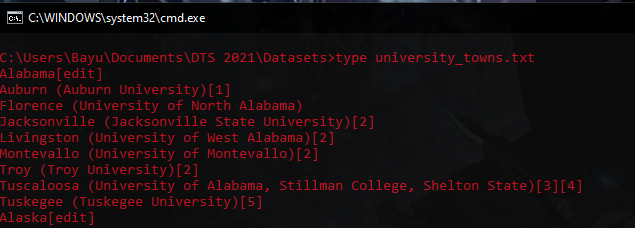

                                             tampilan Command Promt pada windows

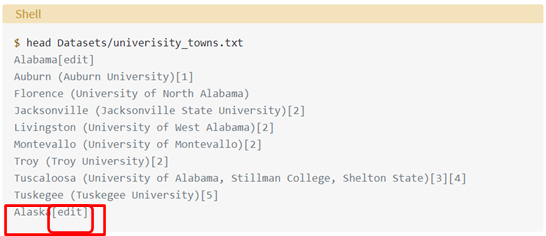
                                                                
                                                  tampilan terminal Linux

* Dapat dilihat di atas, bahwa nama negara bagian(state) diikuti dengan kota asal universitas: StateA TownA1 TownA2 StateB TownB1 TownB2.... 
dan memiliki substring ”[edit]” 


* Kita dapat memanfaatkan pola ini dengan membuat list of (state, city) tuples dan wrapping daftar (list) dalam DataFrame. 



In [29]:
university_towns = []
with open("university_towns.txt") as file:
     for line in file:
         if '[edit]' in line:
             # Remember this `state` until the next is found
             state = line
         else:
             # Otherwise, we have a city; keep `state` as last-seen
             university_towns.append((state, line))

university_towns[:5]

[('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

* Kita dapat membungkus (wrap) daftar ini dalam DataFrame dan mengatur kolom sebagai “State” and “RegionName”.
* Pandas akan mengambil setiap elemen dalam daftar dan mengatur "State" ke nilai kiri dan “RegionName” ke nilai kanan.
* Hasilnya adalah DataFrame sbb:

In [30]:
towns_df = pd.DataFrame(university_towns,
                        columns=['State', 'RegionName'])

towns_df.head()

,State,RegionName
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


* Pandas, mempermudah dalam pembersihan string dengan hanya membutuhkan nama state  dan nama town dan dapat membuang lainnya. Selain dapat kembali menggunakan metode  .str() di Pandas, dapat juga menggunakan applymap() untuk memetakan setiap elemen di DataFrame
* Perhatikan kasus sederhana pada contoh DataFrame berikut:  


In [31]:
contoh_data = {0 : ['mock','python','real','numpy'],
               1 : ['Dataset','pandas','python','clean']}

contoh_dataframe = pd.DataFrame(contoh_data)

contoh_dataframe.head()

,0,1
0,mock,Dataset
1,python,pandas
2,real,python
3,numpy,clean


* Pada contoh di atas, setiap sel (“Mock”, “Dataset”, “Python”, “Real”, dll) adalah elemen. Oleh karena itu perintah applymap() akan menerapkan fungsi ke setiap elemen secara independen. Mari kita definisikan fungsi tsb:  


In [32]:
def get_citystate(item):
     if ' (' in item:
         return item[:item.find(' (')]
     elif '[' in item:
         return item[:item.find('[')]
     else:
         return item

* applymap() di Pandas hanya butuh satu parameter , yaitu fungsi yang diterapkan ke setiap elemen: 


In [33]:
towns_df =  towns_df.applymap(get_citystate)

* Pertama, definisikan fungsi Python yang mengambil setiap elemen  dari DataFrame sebagai parameternya. Di dalam fungsi, pengecekan dilakukan utk menentukan apakah ada elemen atau tidak!
* Tergantung pada pengecekan, nilai dikembalikan berdasarkan fungsi. 
* Lalu, fungsi applymap() dipanggil pada objek yg ada. Sehingga kita dapatkan DataFrame yang relatif lebigh rapih



In [34]:
towns_df.head()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


#### Mengganti Nama Kolom 
---

* Seringkali dalam dataset yang dimiliki ada nama kolom yang suli utk dipahami atau informasi yang tidak penting dalam beberapa baris awal/akhir, misal definisi istilah atau footnotes.
* Oleh karena itu dapat dilakukan penggantian nama dan melewatkan beberapa baris sehingga bisa dilakukan analisis informasi dari baris yang benar atau dapat dipahami. 
* Kita akan lakukan untuk lima baris awal dataset “olympic.csv”:

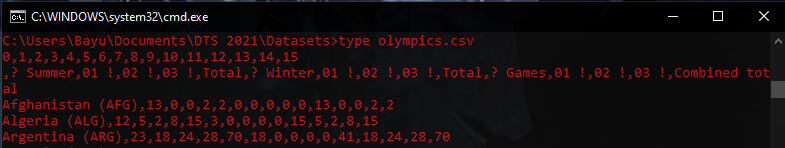

                                                Tampilan Command Prompt Windows

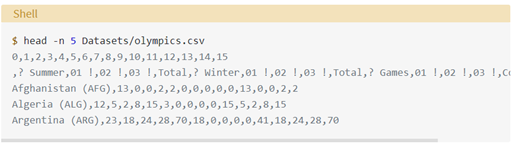

                                                    Tampilan Terminal Linux

* Kemudian, baca dalam DataFrame di Pandas:


In [35]:
olympics_df = pd.read_csv("olympics.csv")
olympics_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


* Hasilnya berantakan! Kolom adalah bentuk string integer indeks 0. Baris yang harusnya sebegai header pada olympics_df.iloc[0]. Hal ini terjadi karena file CSV mulai dengan 0, 1, 2, ...., 15. 
* Dan, jika kita ke sumber dataset ini, akan terlihat NaN yang ada harusnya berisikan “Country” dan “Summer” maksudnya adala”Summer Games” dan “01!” harusnya adalah “Gold” , dll. 


* Oleh karena itu, hal berikut yang perlu dilakukan:
    1. Melewatkan (skip) satu baris dan atur header sebagai baris pertama (indeks-0)
    2. Mengganti Nama Kolom
 
 
 
* Melewatkan baris dan atur header dapat dilakukan pada saat membaca file CSV dengan mempassing beberapa parameter ke fungsi read_csv().
* Fungsi read_csv() memerlukan banyak parameter opsional, namun utk kasus ini hanya diperlukan satu (header) yang dihilangkan pada baris ke-0, dengan hasil sbb:


* Hasil fungsi read_csv() dan menghilangkan satu baris (header):



In [36]:
olympics_df = pd.read_csv("olympics.csv", header=1)
olympics_df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


* Sekarang, yang tampak di atas adalah sekumpulan baris yang benar sebagai header dan semua baris yang tidak dibutuhkan telah dihilangkan. 
* Pandas telah merubah nama kolom yang mengandung nama “countries” dari NaN  menjadi Unnamed:0


* Utk mengganti nama kolom, digunakan metode rename() DataFrame yg memungkinkan memberi label pada axis berdasarkan pemetaan (dalam kasus ini yaitu dict)
* Mulai dengan mendefinisikan suatu kamus yang memetakan nama kolom saat ini sebagi kunci ke yang lebih dapat digunakan” 

In [37]:
new_names =  {'Unnamed: 0': 'Country',
               '? Summer': 'Summer Olympics',
               '01 !': 'Gold',
               '02 !': 'Silver',
               '03 !': 'Bronze',
               '? Winter': 'Winter Olympics',
               '01 !.1': 'Gold.1',
               '02 !.1': 'Silver.1',
               '03 !.1': 'Bronze.1',
               '? Games': '# Games',
               '01 !.2': 'Gold.2',
               '02 !.2': 'Silver.2',
               '03 !.2': 'Bronze.2'}

* Kemudian, panggil fungsi rename() pada objek dimaksud:


In [38]:
olympics_df.rename(columns=new_names, inplace=True)

* Atur inplace menjadi True,
     dengan hasil sbb:


In [39]:
olympics_df.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
